# COVID-19 Analysis & Prediction of Death Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/BracU/project/Covid Data.csv")


# **DATASET**
This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: female or male

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: hospitalized or not hospitalized.

pneumonia: whether the patient already have air sacs inflammation or not.

pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

death: indicates whether the patient died or recovered.

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
data.shape

(1048575, 21)

In [ ]:
data[data.duplicated()]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
data = data[(data.PNEUMONIA == 1) | (data.PNEUMONIA == 2)]
data = data[(data.DIABETES == 1) | (data.DIABETES == 2)]
data = data[(data.COPD == 1) | (data.COPD == 2)]
data = data[(data.ASTHMA == 1) | (data.ASTHMA == 2)]
data = data[(data.INMSUPR == 1) | (data.INMSUPR == 2)]
data = data[(data.HIPERTENSION == 1) | (data.HIPERTENSION == 2)]
data = data[(data.OTHER_DISEASE == 1) | (data.OTHER_DISEASE == 2)]
data = data[(data.CARDIOVASCULAR == 1) | (data.CARDIOVASCULAR == 2)]
data = data[(data.OBESITY == 1) | (data.OBESITY == 2)]
data = data[(data.RENAL_CHRONIC == 1) | (data.RENAL_CHRONIC == 2)]
data = data[(data.TOBACCO == 1) | (data.TOBACCO == 2)]
data.PREGNANT = data.PREGNANT.replace(97,2)
data = data[(data.PREGNANT == 1) | (data.PREGNANT == 2)]

In [ ]:
data["DEATH"] = [2 if each=="9999-99-99" else 1 for each in data.DATE_DIED]

In [ ]:
data.shape

(1021977, 22)

In [ ]:
data.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [ ]:
data.shape

(1021977, 19)

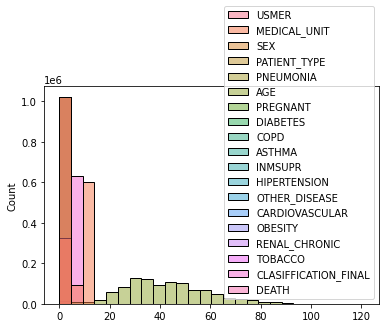

In [ ]:
sns.histplot(data=data,common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True)

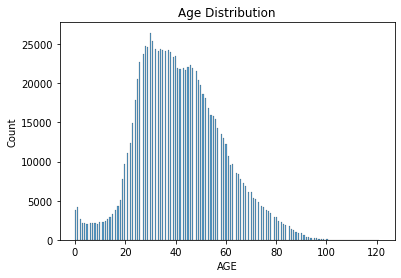

In [ ]:
sns.histplot(x=data.AGE)
plt.title("Age Distribution");

Patient are mostly between 20 to 60 



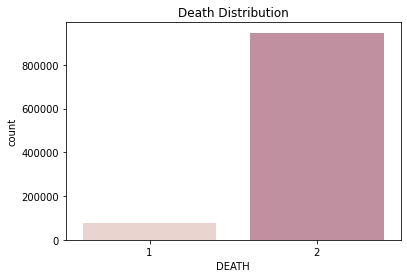

In [ ]:
ax = sns.countplot(data.DEATH,palette=sns.cubehelix_palette(4))
plt.title("Death Distribution");

DEATH ratio is low 

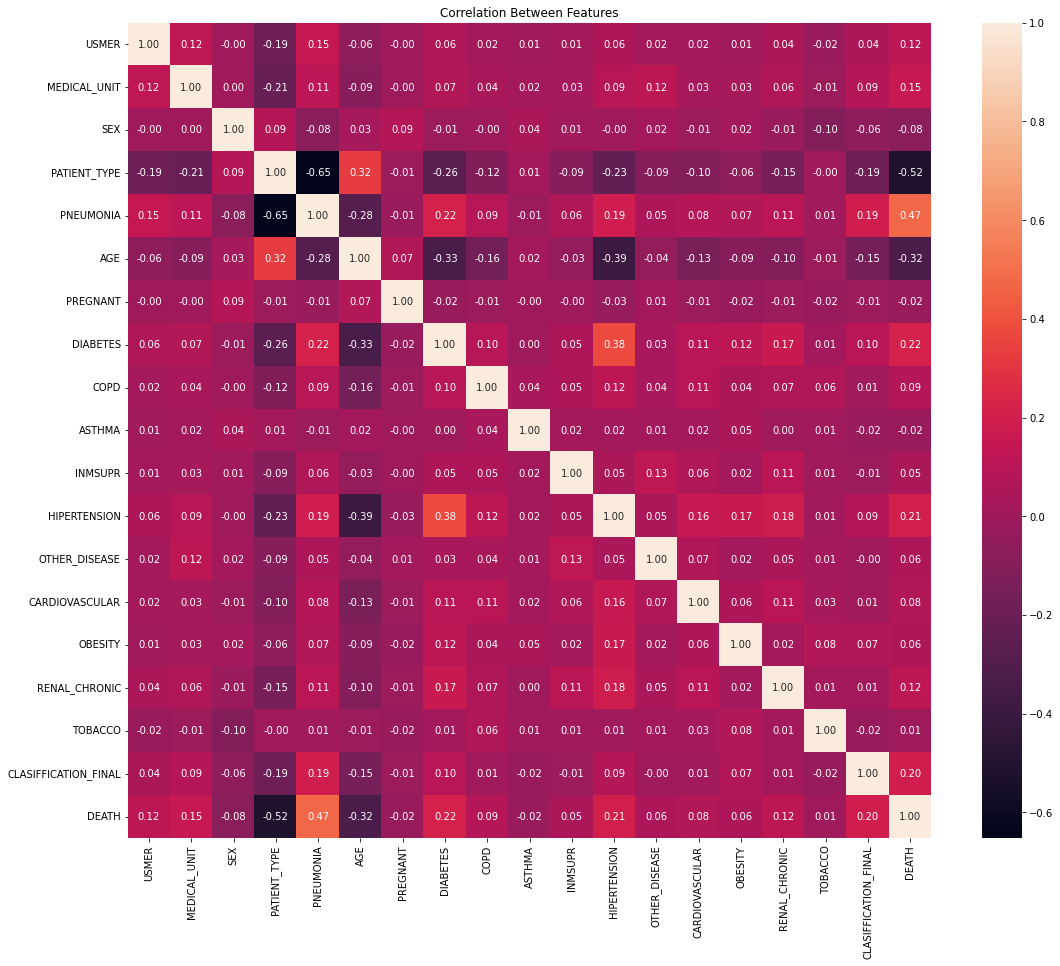

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features");

In [ ]:
x= data.drop(columns="DEATH")
y=data['DEATH']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(random_state=1, solver='lbfgs',multi_class='auto', max_iter=500)
LR_model.fit(train_x,train_y.values.ravel())
pre=LR_model.predict(test_x)
s=LR_model.score(test_x,test_y)
LR=s*100
print('Logistic Regression accuracy:', s*100)

Logistic Regression accuracy: 93.74889919567899


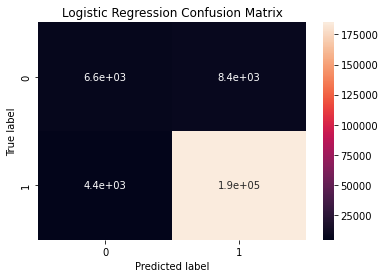

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(test_y, pre), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Confusion Matrix");

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(train_x,train_y.values.ravel())
s=RFC_model.score(test_x,test_y)
RFC=s*100
print("Decision Tree Classifier Accuracy :", s*100)
x=RFC_model.predict(test_x)


Decision Tree Classifier Accuracy : 93.4171901602771


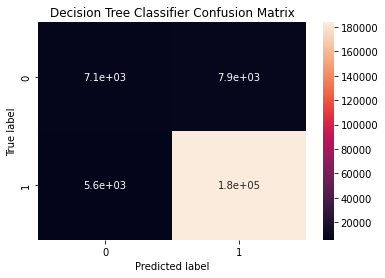

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(test_y, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Decision Tree Classifier Confusion Matrix");

In [ ]:
x= data.drop(columns="DEATH")
y=data['DEATH']
from sklearn.model_selection import cross_val_score
algorithms = [LR_model,RFC_model]
for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=x, y=y, cv=10)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

LogisticRegression(max_iter=500, random_state=1): 	 0.9221059323645744
RandomForestClassifier(): 	 0.7615695386109134


# Conclusions:
Number of deaths was high from may to july.

There is a strong correlation between obesity and chronic diseases.

Elderly patients (>65) tend to hospatilized.

Incidence of death of COVID is high in elderly.

Age ditributed between 20 and 60.

Age of pregnant is distributed between 18 and 35.

Patients with COPD, CKD, immunosuppression, diabetes, CVS and elderly patient are likely to acquire pneumonia.

Pneumonia increase incidence of death by COVID the most.

A little of patients which returned home died.